Q1. Basic graph attributes: how many nodes and (undirected) edges are in this network?


In [1]:
import networkx as nx

global_net_file_path = "/content/global-net.dat"
gobal_net_graph = nx.read_edgelist(global_net_file_path, nodetype=int)

num_nodes = gobal_net_graph.number_of_nodes()
num_edges = gobal_net_graph.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of undirected edges: {num_edges}")


Number of nodes: 3618
Number of undirected edges: 14142


Q2. How many connected components are in this graph, how many nodes and edges do the largest component contain?

In [2]:
import networkx as nx


global_net_file_path = "/content/global-net.dat"
gobal_net_graph = nx.read_edgelist(global_net_file_path, nodetype=int)


num_components = nx.number_connected_components(gobal_net_graph)
largest_contected_components = max(nx.connected_components(gobal_net_graph), key=len)
largest_subgraph = gobal_net_graph.subgraph(largest_contected_components)

num_nodes_largest = largest_subgraph.number_of_nodes()
num_edges_largest = largest_subgraph.number_of_edges()


print(f"Number of connected components: {num_components}")
print(f"Largest component has {num_nodes_largest} nodes and {num_edges_largest} edges.")


Number of connected components: 1
Largest component has 3618 nodes and 14142 edges.


Q3. Denote the largest component as G. List the top 10 nodes in G having the highest degree, and how many other nodes are they connected to. Please give names of the city/airport, node ids will not be accepted.

In [3]:
import networkx as nx
import pandas as pd

global_net_file_path = "/content/global-net.dat"
global_cities_file_path = "/content/global-cities.dat"

global_net_graph = nx.read_edgelist(global_net_file_path, nodetype=int)

city_df = pd.read_csv(global_cities_file_path, delimiter="|", header=None, names=["Code", "NodeID", "City"])
node_to_city = dict(zip(city_df["NodeID"], city_df["City"]))

largest_component_nodes = max(nx.connected_components(global_net_graph), key=len)
G = global_net_graph.subgraph(largest_component_nodes)


degree_dict = dict(G.degree())
top_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:10]
top_cities = [(node_to_city[node], degree) for node, degree in top_nodes]

print("Top 10 nodes in G with the highest degree:")
for city, degree in top_cities:
    print(f"{city}: {degree} connections")

Top 10 nodes in G with the highest degree:
Paris: 250 connections
London (GB): 242 connections
Frankfurt: 237 connections
Amsterdam: 192 connections
Moscow: 186 connections
Chicago: 184 connections
New York: 179 connections
Atlanta: 172 connections
Dallas/Fort Worth: 147 connections
Houston: 144 connections


Q4. Plot the degree distribution of the network G. Each data point is a pair (x,y) where x is a positive integer and y is the fraction of nodes in the network with degree equal to x. Also plot the degree distribution on a log-log scale. Restrict the range of x between the minimum and maximum degrees. You may filter out data points with a 0 entry. For the log-log scale, use base 10 for both x and y axes. Include numeric labels on each axes for the reader to make sense of the plot.

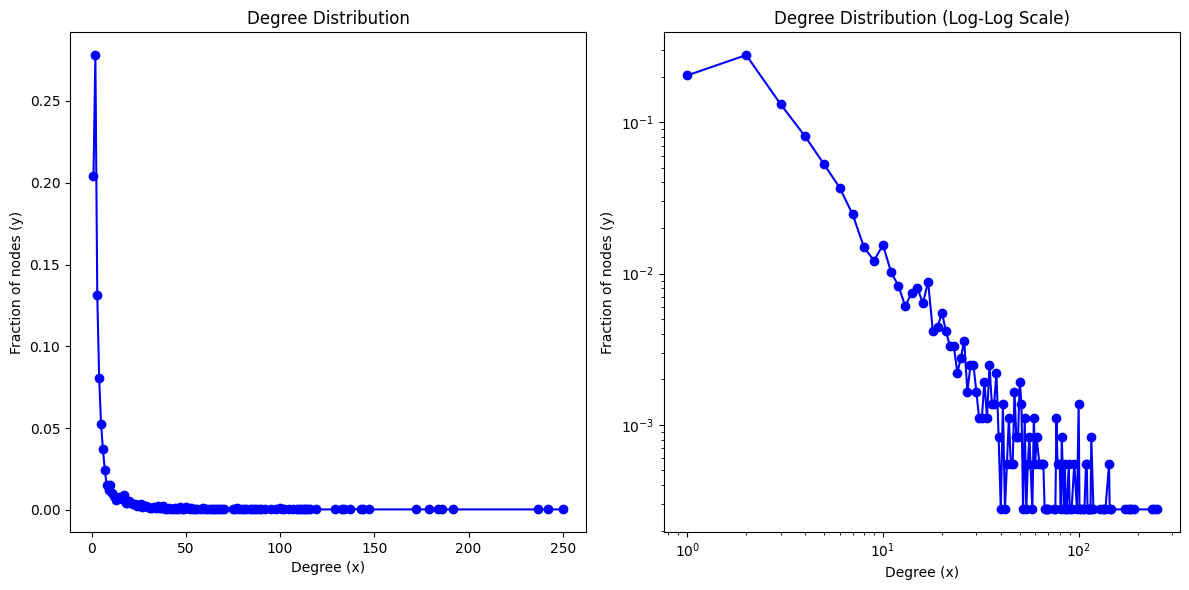

In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


global_net_file_path = "/content/global-net.dat"
global_cities_file_path = "/content/global-cities.dat"

global_net_graph = nx.read_edgelist(global_net_file_path, nodetype=int)

city_df = pd.read_csv(global_cities_file_path, delimiter="|", header=None, names=["Code", "NodeID", "City"])
node_to_city = dict(zip(city_df["NodeID"], city_df["City"]))

largest_component_nodes = max(nx.connected_components(global_net_graph), key=len)
G = global_net_graph.subgraph(largest_component_nodes)
degree_dict = dict(G.degree())

degree_count = {}
for degree in degree_dict.values():
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1


degree_values = sorted(degree_count.items())
degrees = [x for x, _ in degree_values]
counts = [y for _, y in degree_values]

total_nodes = len(G.nodes())
fractions = [count / total_nodes for count in counts]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(degrees, fractions, marker='o', linestyle='-', color='b')
plt.xlabel('Degree (x)')
plt.ylabel('Fraction of nodes (y)')
plt.title('Degree Distribution')

plt.subplot(1, 2, 2)
plt.plot(degrees, fractions, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (x)')
plt.ylabel('Fraction of nodes (y)')
plt.title('Degree Distribution (Log-Log Scale)')

plt.tight_layout()
plt.show()


Q5. What is the (unweighted) diameter of the giant component G in this network? List a longest (unweighted) shortest path between two cities. Please give names of the city/airport, node ids will not be accepted.

In [9]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


global_net_file_path = "/content/global-net.dat"
global_cities_file_path = "/content/global-cities.dat"

global_net_graph = nx.read_edgelist(global_net_file_path, nodetype=int)

city_df = pd.read_csv(global_cities_file_path, delimiter="|", header=None, names=["Code", "NodeID", "City"])
node_to_city = dict(zip(city_df["NodeID"], city_df["City"]))

largest_component_nodes = max(nx.connected_components(global_net_graph), key=len)
largest_subgraph = global_net_graph.subgraph(largest_component_nodes)

longest_path_nodes = nx.periphery(G)
longest_path = max([nx.shortest_path(largest_subgraph, source=a, target=b) for a in longest_path_nodes for b in longest_path_nodes], key=len)
longest_path_cities = [node_to_city[node] for node in longest_path]

print(f"The unweighted diameter of the giant component G is: {len(longest_path) - 1}")
print("The longest (unweighted) shortest path between two cities is:")
for city in longest_path_cities:
    print(city)


The unweighted diameter of the giant component G is: 17
The longest (unweighted) shortest path between two cities is:
Brize Norton
Georgetown (XV)
Mount Pleasant
Punta Arenas
Concepcion (CL)
Santiago (CL)
Buenos Aires
Auckland
Brisbane
Port Moresby
Lae
Indagen
Konge
Kabwum
Satwag
Derim
Yalumet
Wasu


Q6. What is the smallest number of flights you need to take to get from Canberra (CBR) to Cape Town (CPT)? Which airports does your route take you through? Please give names of the city/airport, node ids will not be accepted.


In [10]:
import networkx as nx
import pandas as pd

global_net_file_path = "/content/global-net.dat"
global_cities_file_path = "/content/global-cities.dat"

global_net_graph = nx.read_edgelist(global_net_file_path, nodetype=int)

city_df = pd.read_csv(global_cities_file_path, delimiter="|", header=None, names=["Code", "NodeID", "City"])
node_to_city = dict(zip(city_df["NodeID"], city_df["City"]))

source_city = "Canberra"
target_city = "Cape Town"


source_node = city_df[city_df["City"] == source_city]["NodeID"].values[0]
target_node = city_df[city_df["City"] == target_city]["NodeID"].values[0]


shortest_path_nodes = nx.shortest_path(global_net_graph, source=source_node, target=target_node)
shortest_path_cities = [node_to_city[node] for node in shortest_path_nodes]



print(f"The smallest number of flights from {source_city} to {target_city} is: {len(shortest_path_nodes) - 1}")
print(f"The route takes you through the following airports/cities:")
for city in shortest_path_cities:
    print(city)


The smallest number of flights from Canberra to Cape Town is: 3
The route takes you through the following airports/cities:
Canberra
Melbourne (AU)
Mauritius
Cape Town


Q7. Which airport/city in G is most “central” by having the largest betweeness, list the top 10 cities with their betweeness value?

In [11]:
import networkx as nx
import pandas as pd

global_net_file_path = "/content/global-net.dat"
global_cities_file_path = "/content/global-cities.dat"

global_net_graph = nx.read_edgelist(global_net_file_path, nodetype=int)

city_df = pd.read_csv(global_cities_file_path, delimiter="|", header=None, names=["Code", "NodeID", "City"])
node_to_city = dict(zip(city_df["NodeID"], city_df["City"]))

largest_component_nodes = max(nx.connected_components(global_net_graph), key=len)
G = global_net_graph.subgraph(largest_component_nodes)

betweenness = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

top_cities_by_betweenness = [(node_to_city[node], centrality) for node, centrality in sorted_betweenness]

print("Top 10 cities/airports with the highest betweenness centrality:")
for city, centrality in top_cities_by_betweenness:
    print(f"{city}: {centrality:.6f}")


Top 10 cities/airports with the highest betweenness centrality:
Paris: 0.093420
London (GB): 0.084989
Anchorage: 0.081523
Singapore: 0.075362
New York: 0.069283
Los Angeles (US): 0.066250
Frankfurt: 0.065578
Port Moresby: 0.064323
Tokyo: 0.060243
Seattle: 0.052379
